In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# load file approach 1
fileName = 'data_00.csv'
df1 = pd.read_csv(fileName)

In [3]:
# load file approach 2
fileName = 'data_00.csv'
df = pd.read_csv(fileName, index_col='datetime')



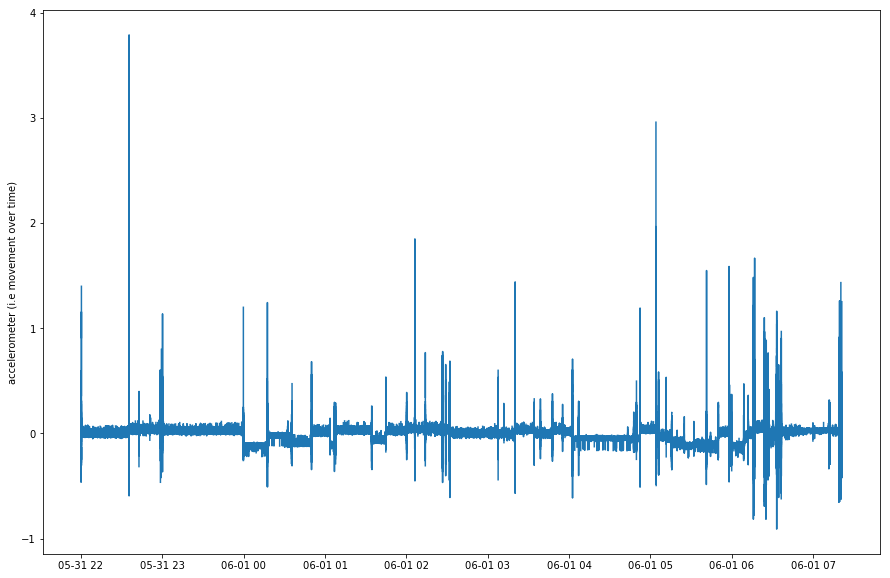

In [4]:

magnitude = df['wearable-mag-xl1']
datetime = pd.to_datetime(df.index)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_ylabel('accelerometer (i.e movement over time)')
ax.plot(datetime, magnitude)

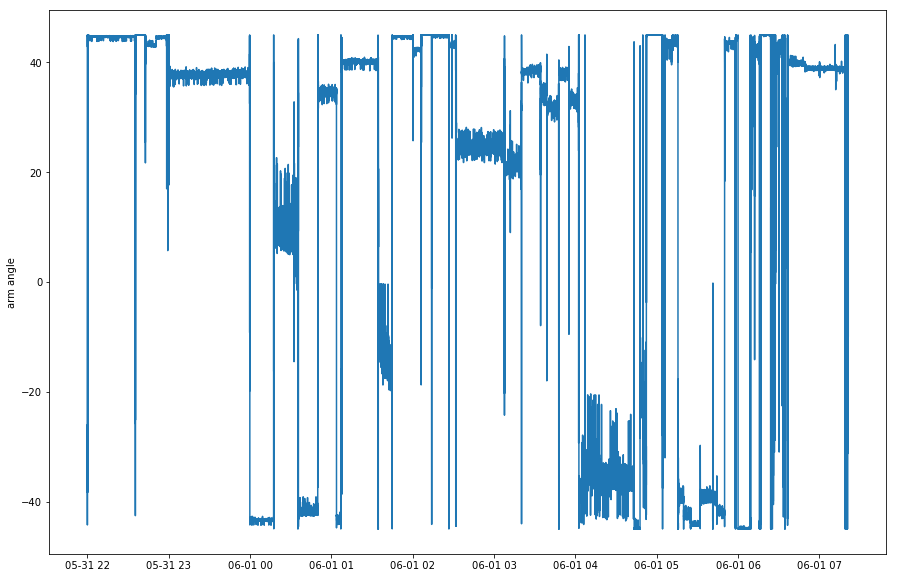

In [5]:
# classifying sleep arm angle

accelerometer_directions = df[['wearable-xl1-x', 'wearable-xl1-y', 'wearable-xl1-z']]

# get rid of rows with missing values
accelerometer_directions = accelerometer_directions.dropna()
datetime = pd.to_datetime(accelerometer_directions.index)

# arm angle calculation using accelerometer data
accelerometer_directions['angle'] = 180/np.pi * np.arctan(accelerometer_directions['wearable-xl1-z'] / np.sqrt( np.square(accelerometer_directions['wearable-xl1-x']) + np.square(accelerometer_directions['wearable-xl1-z']) ))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_ylabel('arm angle')
ax.plot(datetime, accelerometer_directions['angle'])

model for arm angle:  $$ \theta_{\text{arm}} = tan^{-1} \bigg(\frac{ a_{z} }{ \sqrt{a_{x}^{2} + a_{y}^{2}} } \bigg) $$

In [20]:
# calculate the average for every 5 minues for the "arm angle"

# convert index to DatetimeIndex
accelerometer_directions.index = pd.DatetimeIndex(accelerometer_directions.index)

# average values within 5 min intervals

print(accelerometer_directions)
resample_5min_accel = accelerometer_directions.resample('1Min')#.min()


# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(111)
# ax.set_title('Arm angle with 5 min resampling')
# ax.set_ylabel('arm angle')
# ax.plot(resample_5min_accel.index, resample_5min_accel['angle'])

                            wearable-xl1-x  wearable-xl1-y  wearable-xl1-z  \
datetime                                                                     
2016-05-31 21:59:59.919856          -0.648           0.238          -0.652   
2016-05-31 21:59:59.969904          -0.574           0.472          -0.500   
2016-05-31 22:00:00.019952          -0.690           0.338          -0.492   
2016-05-31 22:00:00.070000          -0.658           0.396          -0.504   
2016-05-31 22:00:00.119856          -0.656           0.328          -0.442   
2016-05-31 22:00:00.169904          -0.672           0.608          -0.386   
2016-05-31 22:00:00.219952          -0.648           0.318          -0.480   
2016-05-31 22:00:00.270000          -0.752           0.214          -0.762   
2016-05-31 22:00:00.319856          -0.680           0.358          -0.640   
2016-05-31 22:00:00.369904          -0.746           0.582          -0.962   
2016-05-31 22:00:00.419952          -0.832           0.316      

In [11]:
resample_5min_accel['angle'].min()


datetime
2016-05-31 21:55:00   -35.347283
2016-05-31 22:00:00   -44.242768
2016-05-31 22:05:00    43.814783
2016-05-31 22:10:00    43.939399
2016-05-31 22:15:00    43.787842
2016-05-31 22:20:00    43.855867
2016-05-31 22:25:00    43.802101
2016-05-31 22:30:00    43.855867
2016-05-31 22:35:00   -42.553871
2016-05-31 22:40:00    21.698480
2016-05-31 22:45:00    42.820751
2016-05-31 22:50:00    42.829881
2016-05-31 22:55:00     5.717586
2016-05-31 23:00:00    17.675940
2016-05-31 23:05:00    36.062107
2016-05-31 23:10:00    35.710725
2016-05-31 23:15:00    35.971975
2016-05-31 23:20:00    35.791113
2016-05-31 23:25:00    35.792584
2016-05-31 23:30:00    35.856679
2016-05-31 23:35:00    35.794063
2016-05-31 23:40:00    36.181135
2016-05-31 23:45:00    35.936473
2016-05-31 23:50:00    36.009340
2016-05-31 23:55:00   -44.239646
2016-06-01 00:00:00   -44.293055
2016-06-01 00:05:00   -44.293055
2016-06-01 00:10:00   -44.289671
2016-06-01 00:15:00   -44.947747
2016-06-01 00:20:00     5.197744
 

/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


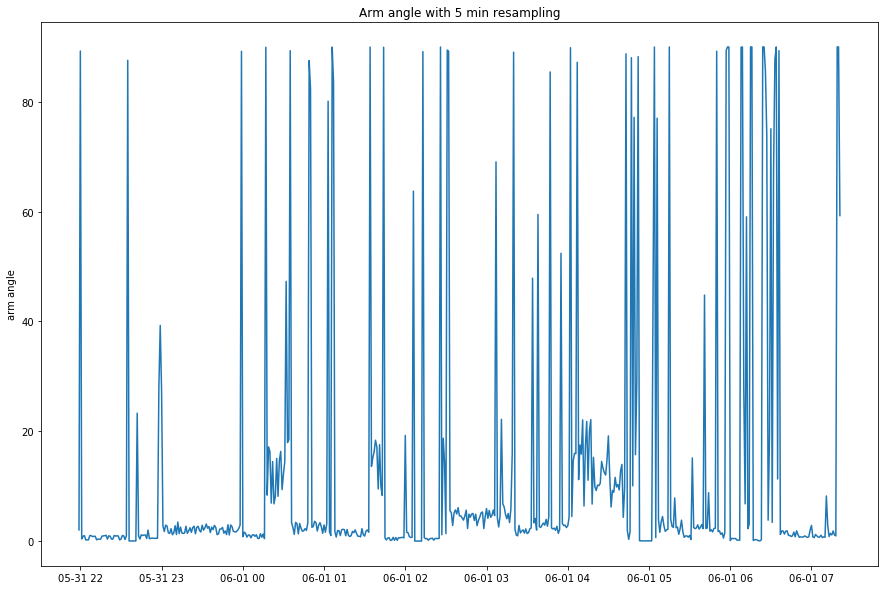

In [21]:
a = resample_5min_accel['angle'].max()-resample_5min_accel['angle'].min()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Arm angle with 5 min resampling')
ax.set_ylabel('arm angle')
ax.plot(resample_5min_accel.index, a)

In [19]:
a

datetime
2016-05-31 21:55:00     2.049215
2016-05-31 22:00:00    89.242500
2016-05-31 22:05:00     1.044393
2016-05-31 22:10:00     0.935743
2016-05-31 22:15:00     1.093595
2016-05-31 22:20:00     0.992256
2016-05-31 22:25:00     1.046909
2016-05-31 22:30:00     1.025570
2016-05-31 22:35:00    87.553809
2016-05-31 22:40:00    23.301457
2016-05-31 22:45:00     1.231912
2016-05-31 22:50:00     2.030809
2016-05-31 22:55:00    39.282363
2016-05-31 23:00:00    27.323774
2016-05-31 23:05:00     2.564483
2016-05-31 23:10:00     3.478778
2016-05-31 23:15:00     2.728225
2016-05-31 23:20:00     3.254061
2016-05-31 23:25:00     2.972173
2016-05-31 23:30:00     3.121458
2016-05-31 23:35:00     2.977947
2016-05-31 23:40:00     2.710240
2016-05-31 23:45:00     2.992783
2016-05-31 23:50:00     3.091286
2016-05-31 23:55:00    89.198597
2016-06-01 00:00:00     1.640248
2016-06-01 00:05:00     1.610980
2016-06-01 00:10:00     1.413682
2016-06-01 00:15:00    89.944814
2016-06-01 00:20:00    16.332578
 

### using this resampled data what can I do to detect sleep


* over 5 min 5angle
* work out the angle deviation
* frequency
* and max moved